In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind


url = 'https://drive.usercontent.google.com/download?id=1mbUQlMTrNYA7Ly5eImVRBn16Ehy9Lggo&export=download&authuser=0&confirm=t&uuid=9e6e5d4b-d7de-475e-87c1-30313bec51eb&at=AENtkXaicSIhSbOG1l58SL5lcPWo%3A1730320503242.csv'
data = pd.read_csv(url)


data = data[(data['DATASET'] == "2022 Cross-Sectional") & (data['DEMO_age'] < 24)]


west_provinces = ['Yukon', 'Northwest Territories', 'British Columbia', 'Alberta', 'Saskatchewan', 'Manitoba']
east_provinces = ['Ontario', 'Québec', 'Newfoundland and Labrador', 'New Brunswick', 'Prince Edward Island', 'Nova Scotia']


data['Region'] = data['GEO_province'].apply(
    lambda x: 'West' if x in west_provinces else ('East' if x in east_provinces else None)
)


subset_data = data.dropna(subset=['PSYCH_body_self_image_questionnaire_negative_affect_score', 'Region'])


west_scores = subset_data[subset_data['Region'] == 'West']['PSYCH_body_self_image_questionnaire_negative_affect_score']
east_scores = subset_data[subset_data['Region'] == 'East']['PSYCH_body_self_image_questionnaire_negative_affect_score']


observed_mean_difference = east_scores.mean() - west_scores.mean()
print("Observed Mean Difference (East - West):", observed_mean_difference)


t_stat, p_value = ttest_ind(east_scores, west_scores, alternative='greater')
print("T-statistic:", t_stat)
print("P-value:", p_value)


alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: East has a higher average negative affect score than West.")
else:
    print("Fail to reject the null hypothesis: No significant evidence that East has a higher average negative affect score than West.")


/tmp/ipykernel_70/2573565735.py:7: DtypeWarning: Columns (408,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1463,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url)


Observed Mean Difference (East - West): 0.7788461538461533
T-statistic: 0.8090791850688261
P-value: 0.21162810275858973
Fail to reject the null hypothesis: No significant evidence that East has a higher average negative affect score than West.


In [2]:

np.random.seed(42) 
n_bootstrap = 10000  

pooled_data = np.concatenate([east_scores.values, west_scores.values])


bootstrap_differences = []


n_east, n_west = len(east_scores), len(west_scores)
for _ in range(n_bootstrap):
    shuffled = np.random.choice(pooled_data, size=len(pooled_data), replace=True)
    east_sample = shuffled[:n_east]
    west_sample = shuffled[n_east:]
    bootstrap_differences.append(east_sample.mean() - west_sample.mean())


bootstrap_differences = np.array(bootstrap_differences)


p_value_bootstrap = np.mean(bootstrap_differences >= observed_mean_difference)
print("Bootstrap p-value:", p_value_bootstrap)


confidence_interval = np.quantile(bootstrap_differences, [0.025, 0.975])
print("95% Confidence Interval for Mean Difference:", confidence_interval)


if p_value_bootstrap < alpha:
    print("Reject the null hypothesis based on bootstrap: East has a higher average negative affect score than West.")
else:
    print("Fail to reject the null hypothesis based on bootstrap: No significant evidence that East has a higher average negative affect score than West.")


Bootstrap p-value: 0.2063
95% Confidence Interval for Mean Difference: [-1.83653846  1.90396635]
Fail to reject the null hypothesis based on bootstrap: No significant evidence that East has a higher average negative affect score than West.


/tmp/ipykernel_70/3352713642.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset_data,


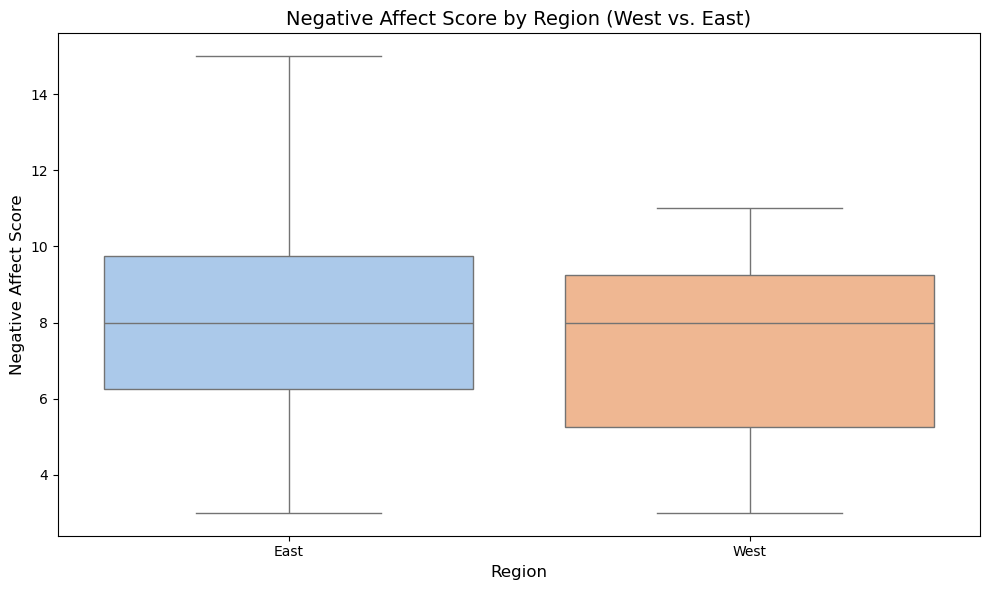

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'subset_data' contains the processed data with columns 'Region' and 'PSYCH_body_self_image_questionnaire_negative_affect_score'

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=subset_data, 
            x='Region', 
            y='PSYCH_body_self_image_questionnaire_negative_affect_score', 
            palette='pastel')

# Add titles and labels
plt.title("Negative Affect Score by Region (West vs. East)", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Negative Affect Score", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


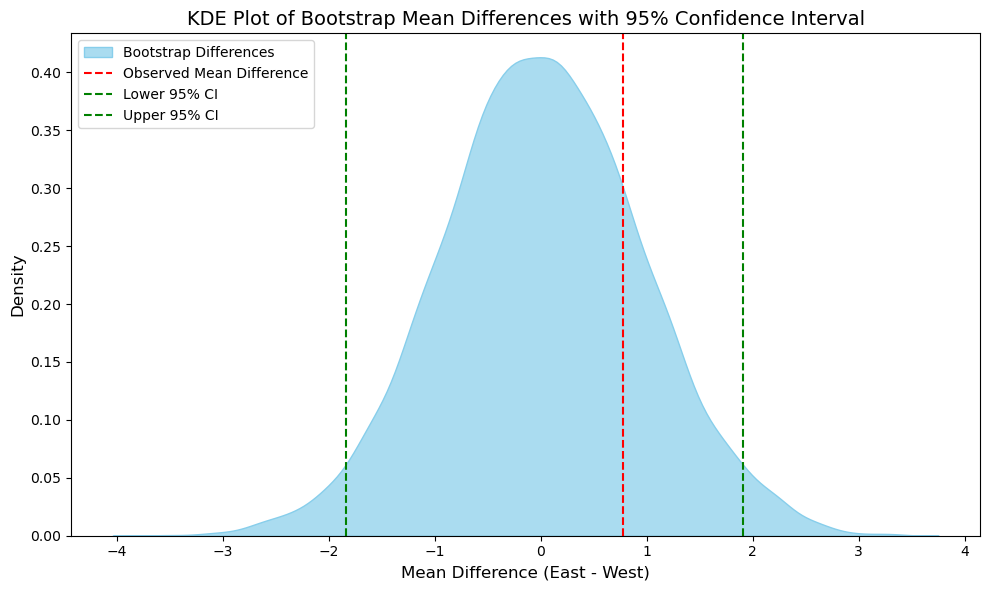

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `bootstrap_differences` contains the bootstrap mean differences
# and `confidence_interval` contains the 95% CI [lower, upper].

# Plotting the KDE for bootstrap differences
plt.figure(figsize=(10, 6))
sns.kdeplot(bootstrap_differences, fill=True, color="skyblue", alpha=0.7, label="Bootstrap Differences")

# Adding lines for the observed mean difference and confidence interval
plt.axvline(observed_mean_difference, color="red", linestyle="--", label="Observed Mean Difference")
plt.axvline(confidence_interval[0], color="green", linestyle="--", label="Lower 95% CI")
plt.axvline(confidence_interval[1], color="green", linestyle="--", label="Upper 95% CI")

# Adding labels and title
plt.title("KDE Plot of Bootstrap Mean Differences with 95% Confidence Interval", fontsize=14)
plt.xlabel("Mean Difference (East - West)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
import pandas as pd

# Calculate the mean negative affect score for each region
average_scores = subset_data.groupby('Region')['PSYCH_body_self_image_questionnaire_negative_affect_score'].mean()

# Print the exact average scores for East and West
print("Exact Average Negative Affect Scores by Region:")
print(average_scores)

# Separate the values for additional clarity
east_average = average_scores.get('East', None)
west_average = average_scores.get('West', None)

print(f"East Average Negative Affect Score: {east_average:.2f}")
print(f"West Average Negative Affect Score: {west_average:.2f}")


Exact Average Negative Affect Scores by Region:
Region
East    8.153846
West    7.375000
Name: PSYCH_body_self_image_questionnaire_negative_affect_score, dtype: float64
East Average Negative Affect Score: 8.15
West Average Negative Affect Score: 7.38
